In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from seaborn import heatmap
from sklearn.decomposition import PCA
import numpy as np
import matplotlib
from IPython.display import display
plt = matplotlib.pyplot

# Getting data
fname = "Dermatology/dermatology.data"
columns = [
    "erythema",
    "scaling",
    "definite borders",
    "itching",
    "koebner phenomenon",
    "polygonal papules",
    "follicular papules",
    "oral mucosal involvement",
    "knee and elbow involvement",
    "scalp involvement",
    "family history, (0 or 1)",
    "melanin incontinence",
    "eosinophils in the infiltrate",
    "PNL infiltrate",
    "fibrosis of the papillary dermis",
    "exocytosis",
    "acanthosis",
    "hyperkeratosis",
    "parakeratosis",
    "clubbing of the rete ridges",
    "elongation of the rete ridges",
    "thinning of the suprapapillary epidermis",
    "spongiform pustule",
    "munro microabcess",
    "focal hypergranulosis",
    "disappearance of the granular layer",
    "vacuolisation and damage of basal layer",
    "spongiosis",
    "saw-tooth appearance of retes",
    "follicular horn plug",
    "perifollicular parakeratosis",
    "inflammatory monoluclear inflitrate",
    "band-like infiltrate",
    "Age (linear)",
    "y"
]
data = pd.read_csv(fname, names=columns)

# Data
Number of features: 34  
Number of linear features: 33  
Number of nominal features: 1  
  
Family history is nominal. Rest are all linear.

In [2]:
data.head()

erythema  scaling  definite borders  itching  koebner phenomenon  \
0         2        2                 0        3                   0   
1         3        3                 3        2                   1   
2         2        1                 2        3                   1   
3         2        2                 2        0                   0   
4         2        3                 2        2                   2   

   polygonal papules  follicular papules  oral mucosal involvement  \
0                  0                   0                         0   
1                  0                   0                         0   
2                  3                   0                         3   
3                  0                   0                         0   
4                  2                   0                         2   

   knee and elbow involvement  scalp involvement  ...  \
0                           1                  0  ...   
1                           1                  1  ...   
2                           0                  0  ...   
3                           3                  2  ...   
4                           0                  0  ...   

   disappearance of the granular layer  \
0                                    0   
1                                    0   
2                                    0   
3                                    3   
4                                    2   

   vacuolisation and damage of basal layer  spongiosis  \
0                                        0           3   
1                                        0           0   
2                                        2           3   
3                                        0           0   
4                                        3           2   

   saw-tooth appearance of retes  follicular horn plug  \
0                              0                     0   
1                              0                     0   
2                              2                     0   
3                              0                     0   
4                              3                     0   

   perifollicular parakeratosis  inflammatory monoluclear inflitrate  \
0                             0                                    1   
1                             0                                    1   
2                             0                                    2   
3                             0                                    3   
4                             0                                    2   

   band-like infiltrate  Age (linear)  y  
0                     0            55  2  
1                     0             8  1  
2                     3            26  3  
3                     0            40  1  
4                     3            45  3  

[5 rows x 35 columns]

In [3]:
# Preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
data_selected = data[data['Age (linear)'] != '?'] # Cleaning rows with unknown ages
data_converted = data_selected.to_numpy(dtype=float)
X = data_converted[:, :-1]

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Decomposition
pca = PCA()
X_scaled = pca.fit_transform(X_scaled)
n_pc = np.argmax(np.cumsum(pca.explained_variance_/sum(pca.explained_variance_)) > 0.99) + 1
X_scaled = X_scaled[:, :n_pc]
y = data_converted[:, -1]

# Data duplication
duplication_constant = 1
X_scaled_duplicated = np.concatenate([X_scaled for i in range(duplication_constant)])
y_duplicated = np.concatenate([y for i in range(duplication_constant)])

# Train test splitting
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled_duplicated, y_duplicated, test_size=0.20)
print("Number of principal components selected:", n_pc)

Number of principal components selected: 29


# Visualisation

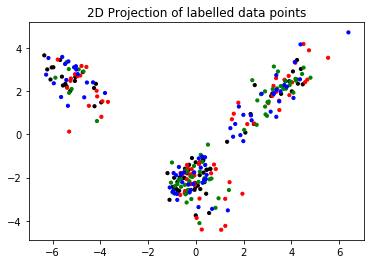

In [4]:
plt.clf()
color_labels = ['black', 'red', 'green', 'blue']
n_points = len(y_train) // duplication_constant
colors = [i for i in range(n_points)]
plt.scatter(X_train_scaled[:n_points, 0], X_train_scaled[:n_points, 1], c=colors, s=10, cmap=matplotlib.colors.ListedColormap(color_labels))
plt.title("2D Projection of labelled data points")
plt.savefig("projected_data.png")
plt.show()

# Objectives
To classify the data using four methods listed below and compare their performances, and learn the concepts behind each classifier to form an intuition of the results.
1. Logistic Regression
2. Decision Tree
3. Support Vector Machine
4. Random Forest

In [5]:
# Classification

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
clfs = {
    "logistic": LogisticRegression(random_state=0, multi_class='multinomial'),
    "decision_tree": DecisionTreeClassifier(random_state=0, criterion='entropy'),
    "svm_rbf": SVC(C=1),
    "svm_linear": SVC(C=1, kernel='linear'),
    "random_forest": RandomForestClassifier(max_depth=2, random_state=0)
}
observations = {
    "logistic": {},
    "decision_tree": {},
    "svm_rbf": {},
    "svm_linear": {},
    "random_forest": {}
}
for c in clfs.items():
    c[1].fit(X_train_scaled, y_train)
    y_test_pred = c[1].predict(X_test_scaled)
    observations[c[0]]["confusion"] = confusion_matrix(y_test, y_test_pred)
    observations[c[0]]["score"] = accuracy_score(y_test, y_test_pred)

# Observations

## Logistic regression

Score: 0.9583333333333334


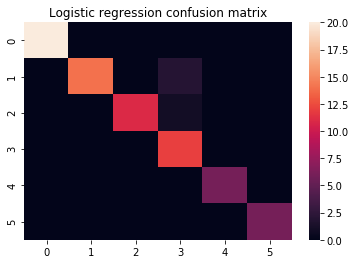

In [6]:
plt.clf()
print("Score:", observations["logistic"]["score"])
heatmap(observations["logistic"]["confusion"])
plt.title("Logistic regression confusion matrix")
plt.savefig("confusion_logistic_regression.png")
plt.show()

## Decision Tree

Score: 0.9583333333333334


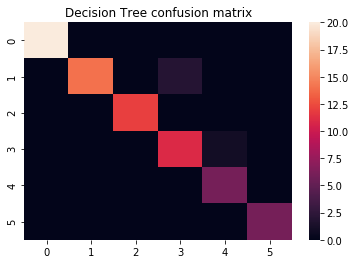

In [7]:
plt.clf()
plt.title("Decision Tree confusion matrix")
print("Score:", observations["decision_tree"]["score"])
display(heatmap(observations["decision_tree"]["confusion"]))
plt.savefig("confusion_decision_tree.png")
plt.show()

## SVM

### RBF

Score: 0.9583333333333334


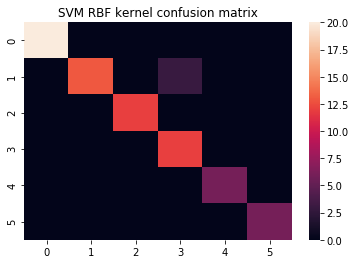

In [8]:
plt.clf()
plt.title("SVM RBF kernel confusion matrix")
print("Score:", observations["svm_rbf"]["score"])
heatmap(observations["svm_rbf"]["confusion"])
plt.savefig("confusion_SVM_rbf.png")
plt.show()

### Linear

Score: 0.9583333333333334


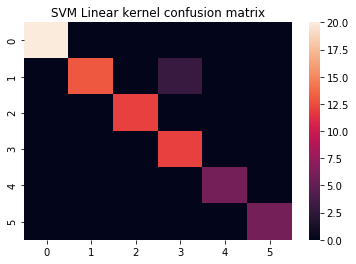

In [9]:
plt.clf()
plt.title("SVM Linear kernel confusion matrix")
print("Score:", observations["svm_linear"]["score"])
heatmap(observations["svm_linear"]["confusion"])
plt.savefig("confusion_SVM_Linear.png")
plt.show()

## Random Forest

Score: 0.7777777777777778


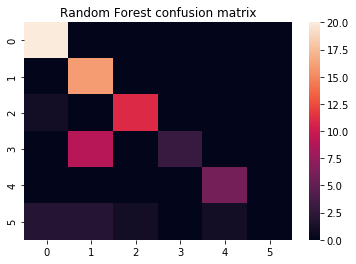

In [10]:
plt.clf()
plt.title("Random Forest confusion matrix")
print("Score:", observations["random_forest"]["score"])
heatmap(observations["random_forest"]["confusion"])
plt.savefig("confusion_random_forest.png")
plt.show()

In [11]:
# Ranking
print("Comparison of scores")
print("--------------------")
print("Score \t\t Method")
for i in sorted(observations.items(), key=lambda x: x[1]["score"], reverse=True):
    print("%.2f" % i[1]["score"], "\t\t", i[0])

Comparison of scores
--------------------
Score 		 Method
0.96 		 logistic
0.96 		 decision_tree
0.96 		 svm_rbf
0.96 		 svm_linear
0.78 		 random_forest
